<a href="https://colab.research.google.com/github/Vit1nh0/DP_Exercises/blob/CNN_Skin_Cancer_Detection/check_1_imagens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Instalando a biblioteca Roboflow para obter o conjunto de dados.

%pip install Roboflow

# Carregando as bibliotecas essenciais para o trabalho com redes neurais.

import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from roboflow import Roboflow
import os
from PIL import Image
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [7]:
# Configurando o acesso à plataforma Roboflow.

rf = Roboflow(api_key='Sua chave privada')
rf.workspace().projects()

loading Roboflow workspace...


['estudo-workspace/brain-tumor-m2pbp-ym6hu',
 'estudo-workspace/check-kvijf',
 'estudo-workspace/fall-eqkvj-n9fmw',
 'estudo-workspace/img-estacionamento-jdgxv',
 'estudo-workspace/my-first-project-xlvwi',
 'estudo-workspace/skin-cancer-types-5irjg',
 'estudo-workspace/vehicle-pedestrian-detection-pmnok']

In [8]:
# Este é um passo para baixar os dados de um projeto específico.

project = rf.workspace("estudo-workspace").project("skin-cancer-types-5irjg")
dataset = project.version(1).download('folder')

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Skin-Cancer-Types-1 in folder:: 100%|██████████| 2069/2069 [00:00<00:00, 7734.58it/s]


In [9]:
path = '/content/Skin-Cancer-Types-1'

# Definindo as configurações para as imagens e o treinamento.
# A altura e largura são de 224x224 pixels, e o tamanho do lote é 64.

img_height, img_width = 224, 224
batch_size = 64

# Criando geradores de dados para alimentar o modelo durante o treinamento.
# A ferramenta `ImageDataGenerator` ajuda a normalizar as imagens e
# separar os dados em conjuntos de treino e validação.

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Preparando o gerador para os dados de treino.

train_generator = train_datagen.flow_from_directory(
    path + "/train",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Preparando o gerador para os dados de validação.

validation_generator = train_datagen.flow_from_directory(
    path + "/valid",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 1327 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


<center>

$$
N_h = \sqrt{N_{in} \cdot N_{out}}
$$

Formula para termos uma ideia do número ideal para testarmos na camada densa

</center>


In [10]:
# A próxima parte do código é sobre a criação e o treinamento do modelo.

# Inicializando um modelo sequencial, que é um empilhamento de camadas.

model_sequential = Sequential([
    # Camada convolucional para extrair características das imagens.
    Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width, 3)),
    # Reduzindo o tamanho da imagem para simplificar a computação.
    MaxPooling2D((2,2)),
    # Outra camada convolucional para aprender características mais complexas.
    Conv2D(64, (3,3), activation='relu'),
    # Mais uma redução de tamanho.
    MaxPooling2D((2,2)),
    # Terceira camada convolucional.
    Conv2D(128, (3,3), activation='relu'),
    # Última redução de tamanho.
    MaxPooling2D((2,2)),
    # Transformando a matriz de imagem em um vetor para as camadas densas.
    Flatten(),
    # Camada totalmente conectada (densa) com 316 neurônios.
    Dense(316, activation='relu'),
    # Camada de saída com 2 neurônios para as duas classes (benigno/maligno).
    Dense(2, activation='softmax') # O softmax é ideal para classificação.
])

# Exibindo um resumo da estrutura do modelo.

model_sequential.summary()

# Compilando o modelo com um otimizador e métricas.
# 'adam' é um otimizador popular, e 'categorical_crossentropy' é a função de
# perda para classificação multiclasse.

model_sequential.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 316)            │    27,343,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           634 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,437,046 (104.66 MB)

 Trainable params: 27,437,046 (104.66 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Treinando o modelo usando os geradores de dados.

history = model_sequential.fit(
    train_generator,
    epochs=12,
    validation_data=validation_generator
)

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.


Epoch 1/12
21/21 ━━━━━━━━━━━━━━━━━━━━ 193s 9s/step - accuracy: 0.5076 - loss: 1.7069 - val_accuracy: 0.6833 - val_loss: 0.6109
Epoch 2/12
21/21 ━━━━━━━━━━━━━━━━━━━━ 163s 8s/step - accuracy: 0.7343 - loss: 0.5596 - val_accuracy: 0.7167 - val_loss: 0.4690
Epoch 3/12
21/21 ━━━━━━━━━━━━━━━━━━━━ 165s 8s/step - accuracy: 0.8457 - loss: 0.3931 - val_accuracy: 0.8667 - val_loss: 0.3258
Epoch 4/12
21/21 ━━━━━━━━━━━━━━━━━━━━ 171s 8s/step - accuracy: 0.8709 - loss: 0.3024 - val_accuracy: 0.8500 - val_loss: 0.5833
Epoch 5/12
21/21 ━━━━━━━━━━━━━━━━━━━━ 165s 8s/step - accuracy: 0.9033 - loss: 0.2521 - val_accuracy: 0.8833 - val_loss: 0.4483
Epoch 6/12
21/21 ━━━━━━━━━━━━━━━━━━━━ 163s 8s/step - accuracy: 0.9104 - loss: 0.2299 - val_accuracy: 0.8833 - val_loss: 0.3859
Epoch 7/12
21/21 ━━━━━━━━━━━━━━━━━━━━ 165s 8s/step - accuracy: 0.9038 - loss: 0.2511 - val_accuracy: 0.8667 - val_loss: 0.4245
Epoch 8/12
21/21 ━━━━━━━━━━━━━━━━━━━━ 166s 8s/step - accuracy: 0.9134 - loss: 0.2100 - val_accuracy: 0.8667 - v

In [12]:
# Salvando o modelo treinado.
model_sequential.save('skin_cancer_classifier_model.keras')

In [18]:
# Caminho da imagem de teste.

img_path = '/content/01.jpg' # Substitua pelo caminho da sua imagem
img = image.load_img(img_path, target_size=(224, 224)) # Carregando e redimensionando a imagem para o tamanho que o modelo espera.
img_array = image.img_to_array(img) # Converte para array
img_array = np.expand_dims(img_array, axis=0) # Adicionando uma dimensão extra para o 'batch', conforme o modelo espera.
img_array /= 255.0 # Normalizando os valores dos pixels para corresponder ao treinamento.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
A previsão do modelo é: benigno
Com probabilidade de: 0.99


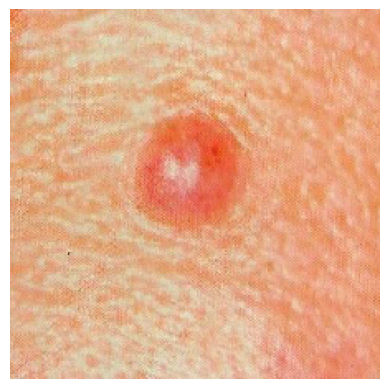

In [19]:
# Carregando o modelo salvo para uso.

loaded_model = load_model('/content/drive/MyDrive/Colab Notebooks/modelos/skin_cancer_classifier_model (1).keras')

# Fazendo a previsão usando o modelo.

predictions =loaded_model.predict(img_array)


# Interpreta a previsão
predicted_class_index = np.argmax(predictions[0])
class_names = ['benigno', 'maligno'] # Mapeamento das classes
predicted_class = class_names[predicted_class_index]

confidence = predictions[0][predicted_class_index]

# Exibe o resultado
print(f'A previsão do modelo é: {predicted_class}')
print(f'Com probabilidade de: {confidence:.2f}')
plt.imshow(img)
plt.axis('off')
plt.show()

In [20]:
class_indices = validation_generator.class_indices

print(class_indices)

{'benign': 0, 'malignant': 1}
